In [1]:
pip install duckdb

Note: you may need to restart the kernel to use updated packages.


In [2]:
###create database
import duckdb
conn = duckdb.connect(database="fproject.311nycopendata")

In [3]:
###load fact nyc311 table
conn.execute("""
    CREATE TABLE fact_nyc311 AS
    SELECT * FROM read_csv_auto('work/311_Service_Requests_from_1Jan25-24Apr25.csv');
""")

CatalogException: Catalog Error: Table with name "fact_nyc311" already exists!

In [4]:
df_csv = conn.execute("SELECT * FROM fact_nyc311").df()
df_csv.shape

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

(1048575, 41)

In [6]:
###query
df_csv = conn.execute("SELECT * FROM fact_nyc311 LIMIT 5").df()
print(df_csv)

   UNIQUE_KEY CREATED_DATE CLOSED_DATE AGENCY  \
0    64733927   2025-04-24         NaT   DSNY   
1    64731261   2025-04-24         NaT   NYPD   
2    64732241   2025-04-24         NaT   NYPD   
3    64733368   2025-04-24         NaT   NYPD   
4    64737184   2025-04-24         NaT   NYPD   

                       AGENCY_NAME           COMPLAINT_TYPE        DESCRIPTOR  \
0         Department of Sanitation                 Graffiti          Graffiti   
1  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party   
2  New York City Police Department      Noise - Residential  Banging/Pounding   
3  New York City Police Department         Blocked Driveway         No Access   
4  New York City Police Department       Noise - Commercial  Loud Music/Party   

                LOCATION_TYPE INCIDENT_ZIP        INCIDENT_ADDRESS  ...  \
0                 Residential        10034       128 SEAMAN AVENUE  ...   
1             Street/Sidewalk        10314        625 CHELSEA ROAD  

In [7]:
###load time dimension table###
conn.execute("""
    CREATE TABLE dim_time AS
    SELECT * FROM read_csv_auto('work/time_dimension.csv');
""")

In [8]:
conn.execute("""
    SELECT * FROM dim_time limit 5;
""").df()

,DAY_ID,DAY_END_DATE,DAY_TIME_SPAN,DAY_DESCRIPTION,DAY_OF_MONTH,DAY_OF_QUARTER,DAY_OF_YEAR,MONTH_ID,MONTH_END_DATE,MONTH_TIME_SPAN,...,QUARTER_DESCRIPTION,QUARTER_OF_YEAR,HALF_YEAR_ID,HALF_YEAR_END_DATE,HALF_YEAR_TIME_SPAN,HALF_YEAR_DESCRIPTION,YEAR_ID,YEAR_END_DATE,YEAR_TIME_SPAN,YEAR_DESCRIPTION
0,1-Jun-24,1-Jun-24,1,2024-06-01,1,62,153,Jun-24,30-Jun-24,30,...,calendar quarter 2,2,CAL2024-H1,30-Jun-24,182,2024,CAL2024,31-Dec-24,366,calendar year 2024
1,2-Jun-24,2-Jun-24,1,2024-06-02,2,63,154,Jun-24,30-Jun-24,30,...,calendar quarter 2,2,CAL2024-H1,30-Jun-24,182,2024,CAL2024,31-Dec-24,366,calendar year 2024
2,3-Jun-24,3-Jun-24,1,2024-06-03,3,64,155,Jun-24,30-Jun-24,30,...,calendar quarter 2,2,CAL2024-H1,30-Jun-24,182,2024,CAL2024,31-Dec-24,366,calendar year 2024
3,4-Jun-24,4-Jun-24,1,2024-06-04,4,65,156,Jun-24,30-Jun-24,30,...,calendar quarter 2,2,CAL2024-H1,30-Jun-24,182,2024,CAL2024,31-Dec-24,366,calendar year 2024
4,5-Jun-24,5-Jun-24,1,2024-06-05,5,66,157,Jun-24,30-Jun-24,30,...,calendar quarter 2,2,CAL2024-H1,30-Jun-24,182,2024,CAL2024,31-Dec-24,366,calendar year 2024


In [9]:
###add index in the dim_time
conn.execute("""
    CREATE INDEX idx_dimtime_daydesc ON dim_time (DAY_DESCRIPTION);
""").df()

,Count


In [10]:
conn.execute("""
    SELECT * FROM fact_nyc311 limit 5;
""").df()

,UNIQUE_KEY,CREATED_DATE,CLOSED_DATE,AGENCY,AGENCY_NAME,COMPLAINT_TYPE,DESCRIPTOR,LOCATION_TYPE,INCIDENT_ZIP,INCIDENT_ADDRESS,...,VEHICLE_TYPE,TAXI_COMPANY_BOROUGH,TAXI_PICK_UP_LOCATION,BRIDGE_HIGHWAY_NAME,BRIDGE_HIGHWAY_DIRECTION,ROAD_RAMP,BRIDGE_HIGHWAY_SEGMENT,LATITUDE,LONGITUDE,LOCATION
0,64733927,2025-04-24,NaT,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,10034,128 SEAMAN AVENUE,...,None,None,None,None,None,None,None,40.868764,-73.923244,"(40.86876366045193, -73.92324431758524)"
1,64731261,2025-04-24,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10314,625 CHELSEA ROAD,...,None,None,None,None,None,None,None,40.602584,-74.189599,"(40.602584106150985, -74.18959919654809)"
2,64732241,2025-04-24,NaT,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11214,8648 18 AVENUE,...,None,None,None,None,None,None,None,40.606380,-74.003583,"(40.606380042715465, -74.00358338771072)"
3,64733368,2025-04-24,NaT,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11228,1401 CROPSEY AVENUE,...,None,None,None,None,None,None,None,40.607598,-74.016898,"(40.607597545588604, -74.01689805211856)"
4,64737184,2025-04-24,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461,127 WESTCHESTER SQUARE,...,None,None,None,None,None,None,None,40.840268,-73.842481,"(40.8402684755769, -73.84248128263012)"


In [11]:
###add index in the fact_table
conn.execute("""
    CREATE INDEX idx_factnyc311_createddate ON fact_nyc311 (created_date);
""").df()

,Count


In [12]:
###check table list
conn.execute("PRAGMA show_tables;").fetchdf()

,name
0,dim_time
1,fact_nyc311


In [14]:
###check table structure
conn.execute("PRAGMA table_info(dim_time);").fetchdf()

,cid,name,type,notnull,dflt_value,pk
0,0,DAY_ID,VARCHAR,False,None,False
1,1,DAY_END_DATE,VARCHAR,False,None,False
2,2,DAY_TIME_SPAN,BIGINT,False,None,False
3,3,DAY_DESCRIPTION,DATE,False,None,False
4,4,DAY_OF_MONTH,BIGINT,False,None,False
5,5,DAY_OF_QUARTER,BIGINT,False,None,False
6,6,DAY_OF_YEAR,BIGINT,False,None,False
7,7,MONTH_ID,VARCHAR,False,None,False
8,8,MONTH_END_DATE,VARCHAR,False,None,False
9,9,MONTH_TIME_SPAN,BIGINT,False,None,False


In [15]:
#daily case
conn.execute("""
    SELECT
    dt.day_description as day
    , coalesce(count(a.unique_key),0) as total
    FROM
    dim_time dt
    left join fact_nyc311 a on dt.day_description = a.created_date
    where 
    dt.day_description between '2025-01-01' and '2025-03-31'
    group by
    dt.day_description
    order by
    dt.day_description
    ;
""").df()

,day,total
0,2025-01-01,0
1,2025-01-02,0
2,2025-01-03,0
3,2025-01-04,5544
4,2025-01-05,13574
...,...,...
85,2025-03-27,9126
86,2025-03-28,9503
87,2025-03-29,8358
88,2025-03-30,8636


In [16]:
#daily case per borough
conn.execute("""
    SELECT
    dt.day_description as day
    , a.borough
    , coalesce(count(a.unique_key),0) as total
    FROM
    dim_time dt
    left join fact_nyc311 a on dt.day_description = a.created_date
    where
    a.borough != 'Unspecified' and
    dt.day_description between '2025-01-01' and '2025-03-31'
    group by
    dt.day_description
    , a.borough
    order by
    a.borough
    , dt.day_description
    ;
""").df()

,day,BOROUGH,total
0,2025-01-04,BRONX,2546
1,2025-01-05,BRONX,7109
2,2025-01-06,BRONX,6397
3,2025-01-07,BRONX,5918
4,2025-01-08,BRONX,4588
...,...,...,...
430,2025-03-27,STATEN ISLAND,388
431,2025-03-28,STATEN ISLAND,376
432,2025-03-29,STATEN ISLAND,292
433,2025-03-30,STATEN ISLAND,311


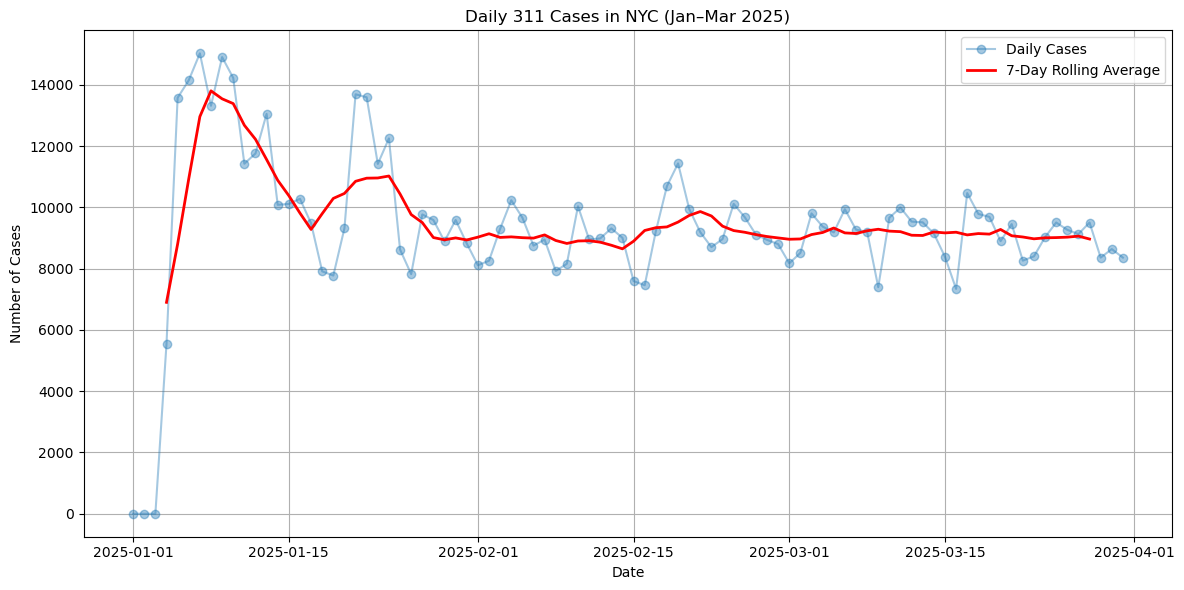

In [4]:
#show trend line comparing number of daily cases
import matplotlib.pyplot as plt
import pandas as pd

# Query the daily total
df_dailytotal = conn.execute("""
    SELECT
        dt.day_description AS day,
        COALESCE(COUNT(a.unique_key), 0) AS total
    FROM
        dim_time dt
    LEFT JOIN fact_nyc311 a ON dt.day_description = a.created_date
    WHERE 
        dt.day_description BETWEEN '2025-01-01' AND '2025-03-31'
    GROUP BY
        dt.day_description
    ORDER BY
        dt.day_description;
""").df()

# Converting 'day' to datetime
df_dailytotal['day'] = pd.to_datetime(df_dailytotal['day'])

# Adding line: rolling average (7-day)
df_dailytotal['rolling_avg'] = df_dailytotal['total'].rolling(window=7, center=True).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_dailytotal['day'], df_dailytotal['total'], label='Daily Cases', alpha=0.4, marker='o')
plt.plot(df_dailytotal['day'], df_dailytotal['rolling_avg'], label='7-Day Rolling Average', color='red', linewidth=2)

plt.title("Daily 311 Cases in NYC (Jan–Mar 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [18]:
#show trend line comparing number of daily cases in every borough

# Running the query and get the DataFrame
df_dailyborough = conn.execute("""
    SELECT
        dt.day_description as day,
        a.borough as borough,
        COALESCE(COUNT(a.unique_key), 0) as total
    FROM
        dim_time dt
    LEFT JOIN fact_nyc311 a ON dt.day_description = a.created_date
    WHERE
        a.borough != 'Unspecified'
        AND dt.day_description BETWEEN '2025-01-01' AND '2025-03-31'
    GROUP BY
        dt.day_description,
        a.borough
    ORDER BY
        a.borough,
        dt.day_description;
""").df()

print(df_dailyborough)

           day        borough  total
0   2025-01-04          BRONX   2546
1   2025-01-05          BRONX   7109
2   2025-01-06          BRONX   6397
3   2025-01-07          BRONX   5918
4   2025-01-08          BRONX   4588
..         ...            ...    ...
430 2025-03-27  STATEN ISLAND    388
431 2025-03-28  STATEN ISLAND    376
432 2025-03-29  STATEN ISLAND    292
433 2025-03-30  STATEN ISLAND    311
434 2025-03-31  STATEN ISLAND    359

[435 rows x 3 columns]


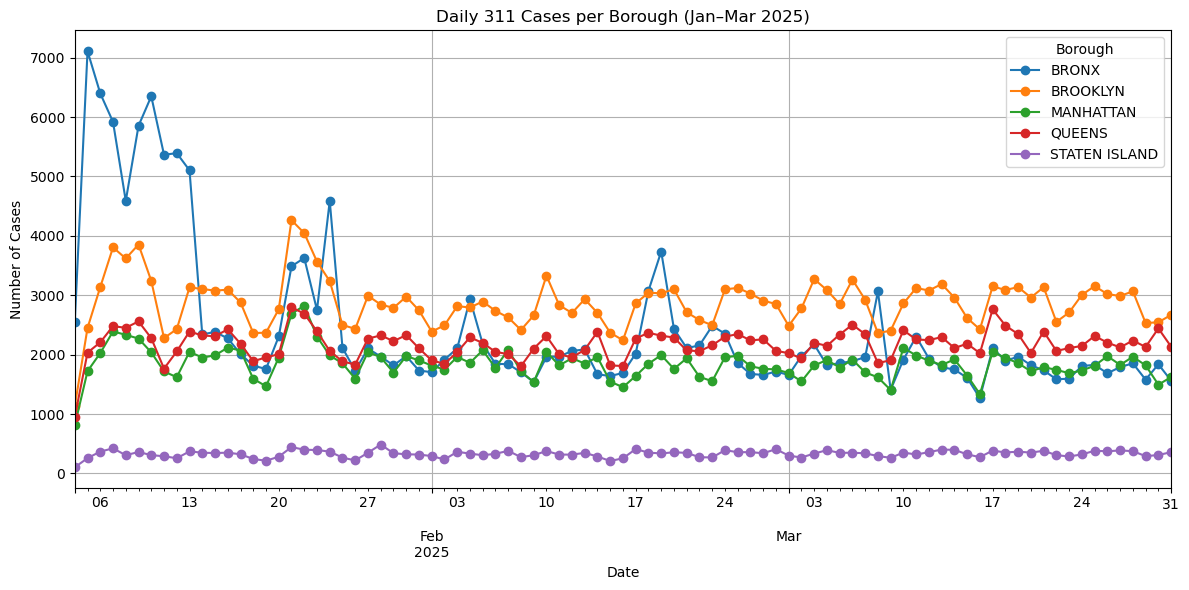

In [19]:
# Ensuring 'day' is a datetime type
df_dailyborough['day'] = pd.to_datetime(df_dailyborough['day'])

# Pivot the table: rows = day, columns = borough, values = total
pivot_df = df_dailyborough.pivot(index='day', columns='borough', values='total')

# Plotting
pivot_df.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Daily 311 Cases per Borough (Jan–Mar 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(title="Borough")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
#monthly ticket status per borough -create our own categories
conn.execute("""
    SELECT
    a.borough as borough
    , dt.month_description as month
    , (CASE 
        WHEN a.status = 'Closed' THEN 'Closed'
        ELSE 'Open'
        END) AS status
    , coalesce(count(a.unique_key),0) as total
    FROM
    dim_time dt
    left join fact_nyc311 a on dt.day_description = a.created_date
    where
    a.borough in ('MANHATTAN','QUEENS','BRONX', 'STATEN ISLAND') and
    dt.day_description between '2025-01-01' and '2025-04-30'
    group by
    a.borough
    , dt.month_description
    , (CASE 
        WHEN a.status = 'Closed' THEN 'Closed'
        ELSE 'Open'
        END)
    order by
    a.borough
    , dt.month_description
    , (CASE 
        WHEN a.status = 'Closed' THEN 'Closed'
        ELSE 'Open'
        END)
    ;
""").df()

,borough,month,status,total
0,BRONX,2025-01-01,Closed,95717
1,BRONX,2025-01-01,Open,1691
2,BRONX,2025-02-01,Closed,56407
3,BRONX,2025-02-01,Open,1723
4,BRONX,2025-03-01,Closed,53356
5,BRONX,2025-03-01,Open,3691
6,BRONX,2025-04-01,Closed,33065
7,BRONX,2025-04-01,Open,7281
8,MANHATTAN,2025-01-01,Closed,50828
9,MANHATTAN,2025-01-01,Open,4128


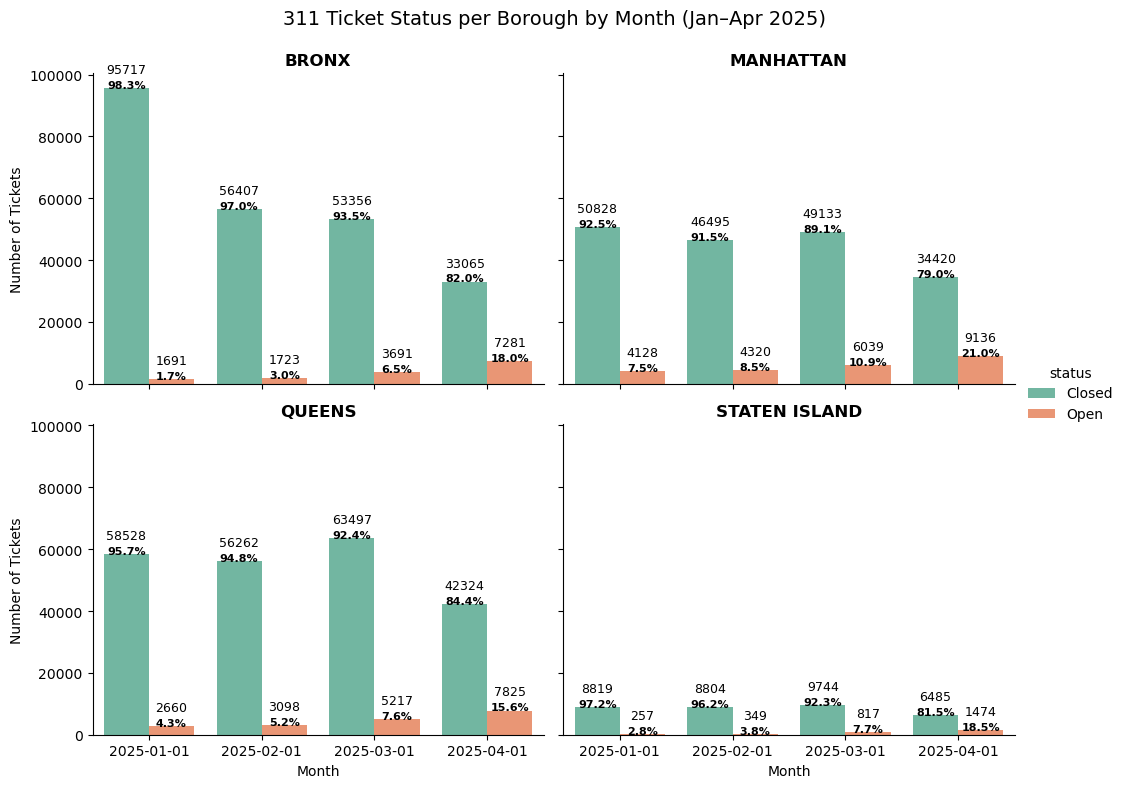

In [45]:
#show bar chart in four quadrants of number of ticket status in each borough
import matplotlib.pyplot as plt
import seaborn as sns

# Query
df_monthly_status = conn.execute("""
    SELECT
        a.borough as borough,
        dt.month_description as month,
        (CASE 
            WHEN a.status = 'Closed' THEN 'Closed'
            ELSE 'Open'
        END) AS status,
        COALESCE(COUNT(a.unique_key), 0) as total
    FROM
        dim_time dt
    LEFT JOIN fact_nyc311 a ON dt.day_description = a.created_date
    WHERE
        a.borough IN ('MANHATTAN','QUEENS','BRONX', 'STATEN ISLAND') AND
        dt.day_description BETWEEN '2025-01-01' AND '2025-04-30'
    GROUP BY
        a.borough,
        dt.month_description,
        (CASE 
            WHEN a.status = 'Closed' THEN 'Closed'
            ELSE 'Open'
        END)
    ORDER BY
        a.borough,
        dt.month_description,
        status;
""").df()

# Calculate total tickets per borough and month (for %)
monthly_totals = df_monthly_status.groupby(['borough', 'month'])['total'].sum().reset_index()
monthly_totals = monthly_totals.rename(columns={'total': 'monthly_total'})

# Merge back to original DataFrame
df_with_percent = df_monthly_status.merge(monthly_totals, on=['borough', 'month'])

# Compute percentage
df_with_percent['percent'] = 100 * df_with_percent['total'] / df_with_percent['monthly_total']

# Ensuring month is string for clean display
df_monthly_status['month'] = df_monthly_status['month'].astype(str)

# Plotting as facet bar chart
g = sns.catplot(
    data=df_monthly_status,
    x='month',
    y='total',
    hue='status',
    col='borough',
    kind='bar',
    col_wrap=2,  # Arrange into 2x2 quadrants
    height=4,
    aspect=1.3,
    palette='Set2'
)

# Adding titles
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    ax.set_title(ax.get_title(), fontsize=12, fontweight='bold')

# Labels and spacing
g.set_axis_labels("Month", "Number of Tickets")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("311 Ticket Status per Borough by Month (Jan–Apr 2025)", fontsize=14)

# Add simple count + % labels
for ax in g.axes.flatten():
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            for index, row in df_with_percent.iterrows():
                if abs(row['total'] - height) < 1e-1 and ax.get_title() == row['borough']:
                    count = f"{int(row['total'])}"
                    percent = f"{row['percent']:.1f}%"
                    ax.text(x, height + 8, f"{count}\n", ha='center', fontsize=9)
                    ax.text(x, height + 22, percent, ha='center', fontsize=8, fontweight='bold')
                    break

plt.show()


In [7]:
#daily case per complaint
conn.execute("""
    SELECT
    --dt.day_description as day
    a.complaint_type
    , coalesce(count(a.unique_key),0) as total
    FROM
    dim_time dt
    left join fact_nyc311 a on dt.day_description = a.created_date
    where
    a.borough != 'Unspecified' and
    dt.day_description between '2025-01-01' and '2025-01-15'
    group by
    --dt.day_description,
    a.complaint_type
    order by
    total desc
   -- , dt.day_description
    ;
""").df()

,COMPLAINT_TYPE,total
0,Noise - Residential,41045
1,HEAT/HOT WATER,27431
2,Illegal Parking,16485
3,Blocked Driveway,5471
4,UNSANITARY CONDITION,3948
...,...,...
148,Building Condition,1
149,Oil or Gas Spill,1
150,Bench,1
151,Institution Disposal Complaint,1


In [21]:
conn.execute("""
    SELECT
    dt.day_description as day,
    a.complaint_type as complaint_type
    , coalesce(count(a.unique_key),0) as total
    FROM
    dim_time dt
    left join fact_nyc311 a on dt.day_description = a.created_date
    where
    a.borough != 'Unspecified' and
    dt.day_description between '2025-01-01' and '2025-01-15'
    group by
    dt.day_description,
    a.complaint_type
    order by
    total desc
    limit 15
    ;
""").df()

,day,complaint_type,total
0,2025-01-05,Noise - Residential,6053
1,2025-01-10,Noise - Residential,4770
2,2025-01-12,Noise - Residential,4742
3,2025-01-11,Noise - Residential,4552
4,2025-01-06,Noise - Residential,4449
5,2025-01-08,HEAT/HOT WATER,3845
6,2025-01-13,Noise - Residential,3795
7,2025-01-07,HEAT/HOT WATER,3659
8,2025-01-09,Noise - Residential,3620
9,2025-01-09,HEAT/HOT WATER,3599


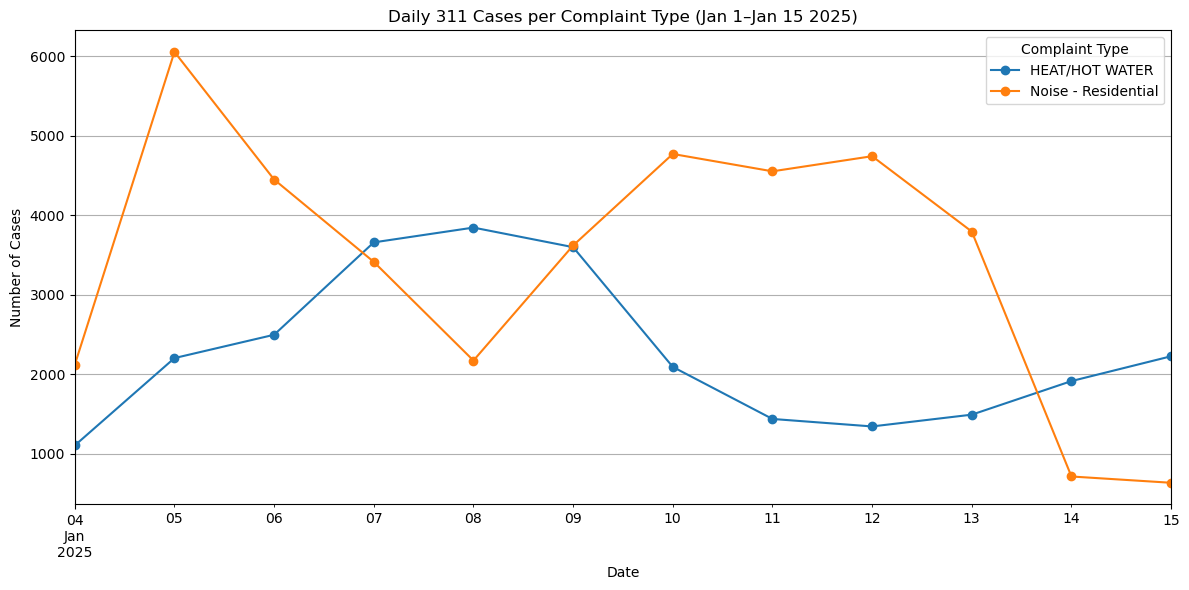

In [20]:
#show trend line comparing number of daily cases in every borough

# Running the query and get the DataFrame
df_dailycomplaint = conn.execute("""
    SELECT
    dt.day_description as day,
    a.complaint_type as complaint_type
    , coalesce(count(a.unique_key),0) as total
    FROM
    dim_time dt
    left join fact_nyc311 a on dt.day_description = a.created_date
    where
    a.borough != 'Unspecified' and
    dt.day_description between '2025-01-01' and '2025-01-15'
    and a.complaint_type in ('Noise - Residential','HEAT/HOT WATER')
    group by
    dt.day_description,
    a.complaint_type
    order by
    a.complaint_type 
    , dt.day_description
    ;
""").df()

# Ensuring 'day' is a datetime type
df_dailycomplaint['day'] = pd.to_datetime(df_dailycomplaint['day'])

# Pivot the table: rows = day, columns = borough, values = total
pivot_df = df_dailycomplaint.pivot(index='day', columns='complaint_type', values='total')

# Plotting
pivot_df.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Daily 311 Cases per Complaint Type (Jan 1–Jan 15 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(title="Complaint Type")
plt.grid(True)
plt.tight_layout()
plt.show()